# Group 7 Tidal Project

### Setting up and loading in the data

In [1]:
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

# converted to days (float) from days hours:minutes
data1 = np.genfromtxt("ASTR19_S22_group_project_data.txt",dtype=str,delimiter=",")
days_list = []
height_list = []
for data in data1:
    day,time,height = data.split()
    hour,minute = time.split(":")
    days = float(day)-1 + (float(hour) + float(minute) / 60) / 24
    #hours = (float(day)-1)*24 + float(hour) + float(minute) / 60
    days_list.append(round(days,2))
    height_list.append(float(height))
days = np.array(days_list)
height = np.array(height_list)

### Function to model the data

In [2]:
# this is the function we're going to optimize
def function(x, a, b, c, d, f, g, h, i, j):
    #return 2*a * np.sin(b * x + c) + d * np.sin(f * x + g) + h
    return a * np.sin(b * x + c) + d * np.sin(f * x + g) + np.sin(h * x + i) + j
    
def function2(x, a, b, c, d):
    return (a * -1 * np.sin(((2 * np.pi)/(b)) * x + c) + d)

### Optimizing the function

In [3]:
# RMSE = 0.25
sig = 0.25
y_err = np.full(len(days),sig)

# works the best p0=[1.4, 1., -3.8, 1.6, -6.8, 3, 1.7, 1, 1]

# fitting the function and specifying starting guesses
p0=[2.4, 3., -3.8, 1.6, -6.8, 3, 1.7, 1, 1]
params, params_covariance = optimize.curve_fit(function, days, height,sigma=y_err, p0=p0)

#params1, params_covariance2 = optimize.curve_fit(function2, days, height,sigma=y_err,p0=[0.5,2*np.pi,0.1,3])
#a, b, c, d = params1
#y_fit = function2(days, a, b, c, d)

# y_fit is the fitted function
a, b, c, d, f, g, h, i, j = params
y_fit = function(days, a, b, c, d, f, g, h, i, j)

### Plotting the results

Text(0, 0.5, 'Tide Height (ft)')

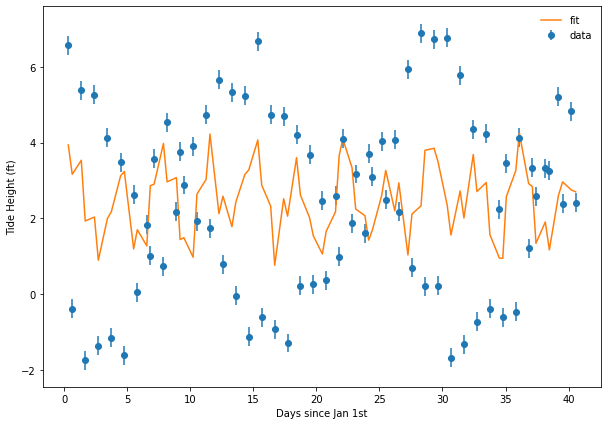

In [4]:
# Now let's plot the results
f = plt.figure(figsize=(10,7))

# plot the data points with error bars = RMSE (y_err)
plt.errorbar(days, height,yerr=y_err,fmt='o',label='data')

# plot the fitted function
plt.plot(days, y_fit, label='fit')

# add some detail to the plot
plt.legend(loc=0,frameon=False)
plt.xlabel("Days since Jan 1st")
plt.ylabel("Tide Height (ft)")

### Residual Plot

[2.633719433978157, -3.552204556435481, 1.8477746835843032, -3.6690475404169183, 3.2257006814061127, -2.2540972597617683, 2.1328190999373975, -3.3227871060308427, 0.3638387331903261, -4.847042083251705, 1.4274024094657842, -1.6493109326309445, 0.5574507313938732, -1.8530121824493466, 0.6684949803497111, -3.2449339972540248, 1.5774770438001808, -0.9044779411057, 2.3198695407478067, 1.391469712101101, 2.9258602125548814, -0.7204614837607219, 1.7046994540071232, -2.484112811503058, 3.5382624429523792, -1.793597450081788, 3.5500071636539325, -2.470831648293242, 2.0762616965887717, -4.402342359194965, 2.6009424149823612, -3.486843725518185, 2.41761891656009, -1.6928347955038787, 2.1719436365278533, -3.3477234915636997, 0.5991758197662307, -2.392171969171098, 1.658733247251083, -1.277071508619781, 1.4116924194393041, -1.2971634870938482, 0.41952160658891824, -2.6663838698117717, 0.00023554320141805363, -1.464618472859173, 0.9259011909079562, -0.4703476470191732, 2.286789089348222, 1.40141583

Text(0.5, 1.0, 'Residual Plot')

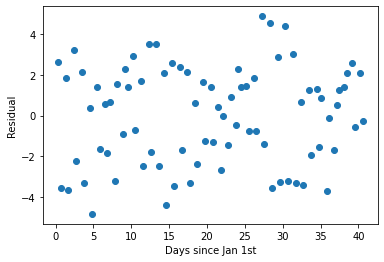

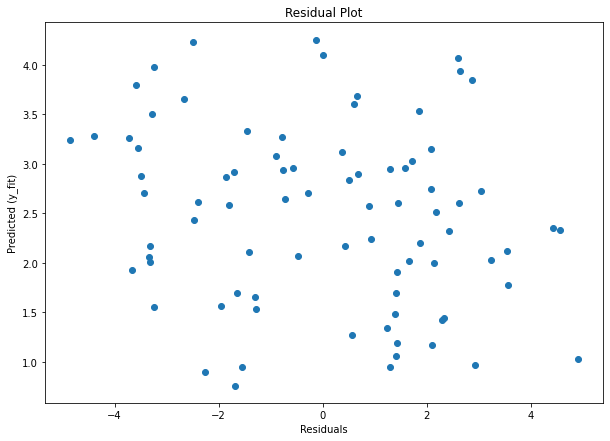

In [5]:
# calculate the residuals (observed - predicted)
residual_list = list(map(lambda real, pred: real - pred, height, y_fit))
print(residual_list)
plt.scatter(days,residual_list)
plt.xlabel("Days since Jan 1st")
plt.ylabel("Residual")

f = plt.figure(figsize=(10,7))
plt.scatter(residual_list,y_fit)
plt.xlabel("Residuals")
plt.ylabel("Predicted (y_fit)")
#plt.errorbar(days, height,yerr=std,fmt='o',label='residual w/std error')
#plt.plot(days, residual_list)
plt.title('Residual Plot')

Residual Histogram

The standard deviation of the residuals is 2.388155293551945


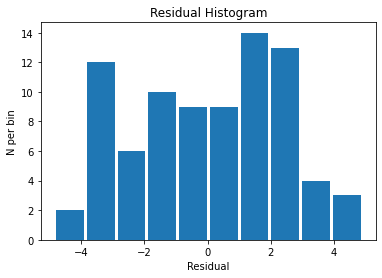

In [6]:
plt.hist(residual_list, rwidth=0.9)
plt.xlabel("Residual")
plt.ylabel("N per bin")
plt.title('Residual Histogram')

plt.savefig('histo.pdf', bbox_inches='tight', facecolor='white')

std = np.std(residual_list)
print(f"The standard deviation of the residuals is {std}")

Height Histogram With Outlier

The tsunami is 2.38064082624931 deviations, in terms of standard deviations of the distribution of normal tides, away from the model


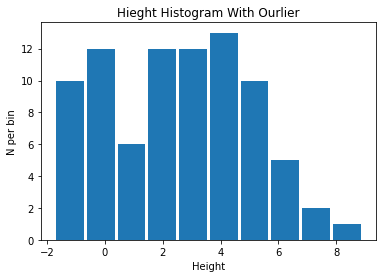

In [7]:
height_tsunami = max(height) + 2
height_normal = height[28]
std_normal = np.std(height)
#print(height_tsunami)
#print(height_normal)
#print(std_normal)
std_outlier = (height_tsunami - height_normal) / std_normal 
#print(std_outlier)
height_outlier = np.append(height, height_tsunami)
plt.hist(height_outlier, rwidth=0.9)
plt.xlabel("Height")
plt.ylabel("N per bin")
plt.title('Hieght Histogram With Ourlier')

std = np.std(height_outlier)
print(f"The tsunami is {std_normal} deviations, in terms of standard deviations of the distribution of normal tides, away from the model")